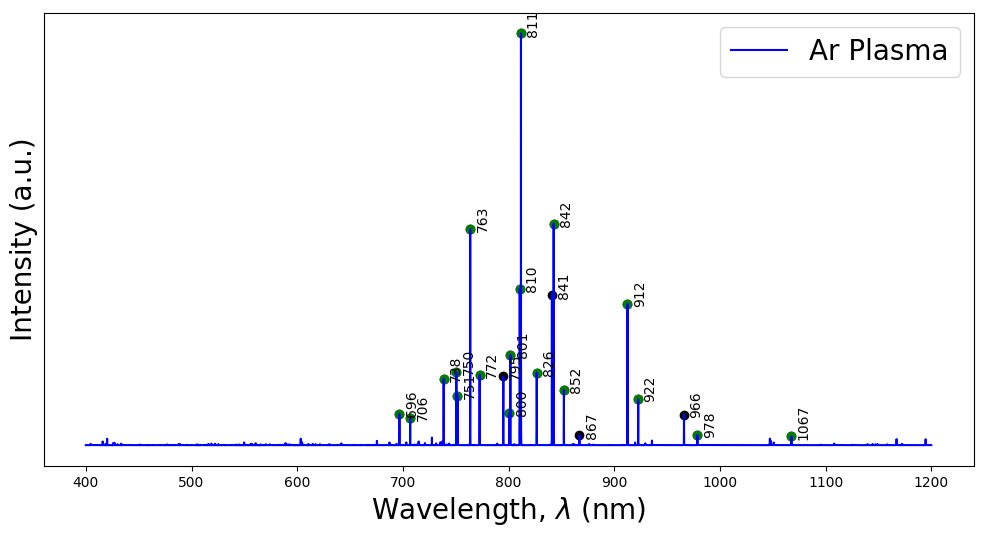

In [1]:
'''
Ali Bakhshi
Accurate analysis of optical emission spectra (OES) of plasma
sample data: Argon plasma
reference data: NIST Argon peaks-observed wavelength in air
'''
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema

####read data frames-argon plasma spectrum
arPlasma = pd.read_csv('Ar2.txt', sep="\t", header=None)
arPlasma=arPlasma.dropna(axis=1) #drop NaN data
arPlasma.columns = ["wavelength", "intensity"] #nm, a.u.

##### read peaks from NIST
nist = pd.read_csv('ArNISTlines.txt', sep="\t", header=0) #observed wavelength in air (vacuum excluded)
nist=np.array(nist["obs_wl_air(nm)"])

####pick sample data (NIST peaks in sample) --> only cheks wavelength (not used)
arPlasmaNISTPeaks= pd.concat([arPlasma.iloc[(arPlasma['wavelength']-k).abs().argsort()[:1]] for k in nist])#2 --> 2 near number

#find local max of sample
maxI = argrelextrema(np.array(arPlasma["intensity"]), np.greater) #array of indexes of the locals max
#pick data with local max intensity
arPlasmaSamplePeak= pd.DataFrame([arPlasma.loc[k] for k in maxI[0]])#2 --> 2 near number

#fing max intensity (used to filter small peaks)
maxI=max(arPlasma["intensity"])
#filter small local max
arPlasmaSamplePeak = arPlasmaSamplePeak[arPlasmaSamplePeak['intensity']>maxI/50]
#check the sample peak with NIST --> green scatter: same (acc: 0.1 nm), black scatter: different
inNIST = arPlasmaSamplePeak[arPlasmaSamplePeak['wavelength'].astype(int).isin(nist.astype(int))]

#####plot data
fig=plt.figure(figsize=(12,6),dpi=100)#,forward=True)
ax=fig.add_subplot()
ax.axes.yaxis.set_ticks([])
#plot sample spectrum
ax.plot(arPlasma["wavelength"],arPlasma["intensity"],color='blue',label="Ar Plasma")

#scatter all filtered peaks-black points
ax.scatter(arPlasmaSamplePeak["wavelength"],arPlasmaSamplePeak["intensity"], c='black')

#scatter common peaks with NIST-green points
ax.scatter(inNIST["wavelength"],inNIST["intensity"], c='green')
#tag peak's wavelength close to the scatter/point of filtered local max
[ax.annotate(str(int(T[0])),rotation=90,xy=(T[0],T[1]),xytext=(T[0]+5,T[1])) for _,T in arPlasmaSamplePeak.iterrows()]
plt.xlabel('Wavelength, $\lambda$ (nm)',fontsize=20)
plt.ylabel('Intensity (a.u.)',fontsize=20)
plt.legend(fontsize=20)
#save final OES spectrom
fig.savefig('ArgonPlasmaSpectrumAnalysis.png',dpi=300)

In [ ]:
'''
Temperature of electrons
'''

In [ ]:
'''
simulation results
'''